**Load** all libraries


In [ ]:
# Library loads
import numpy as np
import sklearn
import pandas as pd
import os

from numpy import random
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn import svm

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import Normalizer
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, mean_squared_error,mean_absolute_error, roc_curve, classification_report, auc)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# For creating plots using data 
'''
import seaborn as sns
import plotly
from plotly import __version__
print(plotly.__version__)
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = 'colab'
'''
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler

**Input files** to be uploaded


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


**Step 1 Loading the Financial 10K input dataset** and verify the content size. Display general information for the loaded variables

In [ ]:
from numpy.random import seed
seed(1)

seed=1

In [ ]:
from numpy.random import seed
seed(1)

seed=1
pd.options.display.float_format = '{:, .0f}'.format
data_2014 = pd.read_csv('/content/drive/My Drive/Data/2014_Financial_Data.csv')
data_2015 = pd.read_csv('/content/drive/My Drive/Data/2015_Financial_Data.csv')
data_2016 = pd.read_csv('/content/drive/My Drive/Data/2016_Financial_Data.csv')
data_2017 = pd.read_csv('/content/drive/My Drive/Data/2017_Financial_Data.csv')
data_2018 = pd.read_csv('/content/drive/My Drive/Data/2018_Financial_Data.csv')
print(data_2014.shape, data_2015.shape, data_2016.shape, data_2017.shape, data_2018.shape)
data_2014.shape, data_2015.shape, data_2016.shape, data_2017.shape, data_2018.shape

(3808, 225) (4120, 225) (4797, 225) (4960, 225) (4392, 225)


((3808, 225), (4120, 225), (4797, 225), (4960, 225), (4392, 225))

**Step 2 Create a function to identify only those variable as from the dataset that are relevant to traget my

In [ ]:
def transform(t):
  t.rename(columns={'Unnamed: 0':'Company Name'},inplace=True)
  t.replace(np.nan, 0)
  t.drop(t[t['Total assets'] ==0].index, inplace = True) 
  t.drop(t[t['Revenue'] ==0].index, inplace = True) 
  t['Total Asset Turnover Ratio'] = t['Revenue'] / t['Total assets']
  t['Gross Margin Ratio'] = t['Gross Margin'] / t['Revenue']
  t['Net Profit Ratio'] = t['Net Profit Margin']/t['Revenue']
  t['Return on Total Assets Ratio'] = t['Net Income']/t['Total assets']
  features = ['Company Name', 'currentRatio','quickRatio', 'Free Cash Flow margin','debtRatio', 'debtEquityRatio',
              'cashFlowToDebtRatio','Return on Tangible Assets','Total Asset Turnover Ratio',
              'Return on Total Assets Ratio','ROE','Gross Margin Ratio',
              'Net Profit Ratio', 'EPS','EPS Diluted','PE ratio', 'PB ratio','priceEarningsToGrowthRatio', 'Sector','Class']
  t = t[features]

  return t



# Concatenating the dataset

In [ ]:
data2014 = transform(data_2014)
data2014['2015StockPriceVar'] = data_2014['2015 PRICE VAR [%]']
data2015 = transform(data_2015)
data2015['2016StockPriceVar'] = data_2015['2016 PRICE VAR [%]']
data2016 = transform(data_2016)
data2016['2017StockPriceVar'] = data_2016['2017 PRICE VAR [%]']
data2017 = transform(data_2017)
data2017['2018StockPriceVar'] = data_2017['2018 PRICE VAR [%]']
data2018 = transform(data_2018)
data2018['2019StockPriceVar'] = data_2018['2019 PRICE VAR [%]']

data2018.shape, data2017.shape, data2016.shape, data2015.shape, data2014.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

((4194, 21), (4756, 21), (4588, 21), (3940, 21), (3637, 21))

In [ ]:
data = pd.concat([data2014,data2015,data2016,data2017], axis=0, sort=False).drop_duplicates()
data.shape


(16921, 24)

In [ ]:
data = data.drop(['2015StockPriceVar','2016StockPriceVar','2017StockPriceVar','2018StockPriceVar'], axis=1)
data.shape
data2018 = data2018.drop(['2019StockPriceVar'], axis=1)
data2018.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 0 to 4391
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Company Name                  4194 non-null   object 
 1   currentRatio                  3951 non-null   float64
 2   quickRatio                    3952 non-null   float64
 3   Free Cash Flow margin         3945 non-null   float64
 4   debtRatio                     3948 non-null   float64
 5   debtEquityRatio               3948 non-null   float64
 6   cashFlowToDebtRatio           3430 non-null   float64
 7   Return on Tangible Assets     3096 non-null   float64
 8   Total Asset Turnover Ratio    4044 non-null   float64
 9   Return on Total Assets Ratio  4044 non-null   float64
 10  ROE                           3943 non-null   float64
 11  Gross Margin Ratio            4147 non-null   float64
 12  Net Profit Ratio              4022 non-null   float64
 13  EPS

In [15]:
data.fillna(0, inplace=True)
data2018.fillna(0, inplace=True)

AttributeError: ignored

In [14]:
print(data.iloc[:, -1].unique().size)

if data.iloc[:, -1].unique().size==2:
    def evaluate(y_test, y_pred, y_scores):
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary', pos_label=1) #labels=np.unique(y_pred))
        recall = recall_score(y_test, y_pred, average='binary', pos_label=1) #labels=np.unique(y_pred))
        f1 = f1_score(y_test, y_pred, average='binary', pos_label=1) #labels=np.unique(y_pred))
        auc = roc_auc_score(y_test, y_scores)
        return [accuracy, precision, recall, f1, auc]
else:

    def evaluate(y_test, y_pred, y_scores):
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', pos_label=1) #labels=np.unique(y_pred))
        recall = recall_score(y_test, y_pred, average='weighted', pos_label=1) #labels=np.unique(y_pred))
        f1 = f1_score(y_test, y_pred, average='weighted', pos_label=1) #labels=np.unique(y_pred))
				#metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))		 

        auc = roc_auc_score(y_test, y_scores)
        return [accuracy, precision, recall, f1, auc]

AttributeError: ignored

In [ ]:
#data.fillna(0, inplace=True)
#data_2016.fillna(0, inplace=True)

# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
#categorical_cols1 = data_2018.columns[categorical_feature_mask].tolist()

print(categorical_cols)
#Use LabelEncoder() to transfer categorical data to numurical data
le=LabelEncoder()
print(len(categorical_cols))
if len(categorical_cols)!=0:
    data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
    #data_2018[categorical_cols] = data_2018[categorical_cols].apply(lambda col: le.fit_transform(col))
#data[categorical_cols].head(5)
#data_2018[categorical_cols1].head(5)

data=np.array(data)
data2018=np.array(data2018)
#If first column is ID, then manuly removed from the dataset

['Company Name', 'Sector']
2


Define Train and Test data and Label data

In [16]:
#X,y=data[:,1:-4], data[:, -1]
#X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20, random_state=seed)
#y_train=y_train.astype(int)

X_train,y_train=data[:,1:-3], data[:, -1]
X_test,y_test=data2018[:,1:-3], data2018[:, -1]
#ros = RandomOverSampler(random_state=0)

#X_train, y_train = ros.fit_resample(X_train, y_train)


scaler = preprocessing.StandardScaler().fit(X_train)
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)



traindata = np.array(X_train2)
trainlabel = np.array(y_train)

testdata = np.array(X_test2)
testlabel = np.array(y_test)

traindata=traindata.astype(float)
trainlabel=trainlabel.astype(int)
testdata=testdata.astype(float)
testlabel = testlabel.astype(int)


Understanding the 2018 10K '2019StockPricevar' values as baseline. Define Train and Test data and Label data

**MLP**

In [ ]:
def MLP(X_train,y_train,X_test,y_test):
    clf = MLPClassifier(solver='lbfgs', activation= 'relu', alpha=1e-5,hidden_layer_sizes=(10, 5), random_state=seed)
    
    l=X_train[0].size
    lr = np.logspace(-5,-1, 5)
    #print(lr)
    #print(X_train[0].size)
    hz=[(10, 5),(10,5,3)]
    param_grid = {'alpha': lr,'hidden_layer_sizes':hz}

    gridcv = sklearn.model_selection.GridSearchCV(clf, param_grid, verbose=1, cv=3)
    gridcv.fit(X_train, y_train)
					 

    gridcv = gridcv.fit(X_train,y_train)
    y_pred = gridcv.best_estimator_.predict(X_test)
    y_scores = gridcv.best_estimator_.predict_proba(X_test)[:,1]

    print("best parameters:", gridcv.best_params_)
    np.savetxt('/content/drive/My Drive/Data/Result/predictedMLP.txt', y_pred, fmt='%01d')
    return evaluate(y_test,y_pred,y_scores)

**Logistic regression**

In [ ]:
def LogisticRegression(X_train,y_train,X_test,y_test):
    clf = sklearn.linear_model.LogisticRegression(random_state=seed, solver='lbfgs')
    clf = clf.fit(X_train,y_train)
								   
					 
							 
    y_pred = clf.predict(X_test)
    y_scores = clf.predict_proba(X_test)[:,1]
    np.savetxt('/content/drive/My Drive/Data/Result/predictedLR.txt', y_pred, fmt='%01d')
    return evaluate(y_test,y_pred,y_scores)

**Decision tree classifier**

In [ ]:
def CART(X_train,y_train,X_test,y_test):
   # clf = tree.DecisionTreeClassifier(max_depth=5)
   # clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=5)

    clf = tree.DecisionTreeClassifier( random_state=seed)

    md=np.arange(1,50,10)
    param_grid = {'max_depth': md}
					 
							 

    gridcv = sklearn.model_selection.GridSearchCV(clf, param_grid, verbose=1, cv=3)
    gridcv.fit(X_train, y_train)

    #clf = clf.fit(X_train,y_train)
    y_pred = gridcv.best_estimator_.predict(X_test)
    y_scores = gridcv.best_estimator_.predict_proba(X_test)[:,1]
    np.savetxt('/content/drive/My Drive/Data/Result/predictedDTbase.txt', y_pred, fmt='%01d')
    print("best parameters:", gridcv.best_params_)
    #tree.plot_tree(clf.fit(X_train,y_train))
    #tree.export_graphviz()
    #dot_data = tree.export_graphviz(clf, out_file=None)
    #graph = graphviz.Source(dot_data)
    #graph.render("tree")
    return evaluate(y_test,y_pred,y_scores)

In [ ]:
#randomforest

def RandomForest(X_train,y_train,X_test,y_test):
    clf = ensemble.RandomForestClassifier(max_features=None,random_state=seed)

    md = np.arange(1, 50, 10)
    ne = np.arange(1, 50, 10)
    param_grid = {'max_depth': md,'n_estimators':ne}
					 
							 

    gridcv = sklearn.model_selection.GridSearchCV(clf, param_grid, verbose=1, cv=2)
    #gridcv = sklearn.model_selection.GridSearchCV(clf, param_grid, verbose=1, cv=3)
    gridcv.fit(X_train, y_train)

    gridcv = gridcv.fit(X_train,y_train)
    y_pred = gridcv.best_estimator_.predict(X_test)
    y_scores = gridcv.best_estimator_.predict_proba(X_test)[:,1]
    print("best parameters:", gridcv.best_params_)
    np.savetxt('/content/drive/My Drive/Data/Result/predictedRFbase.txt', y_pred, fmt='%01d')
    return evaluate(y_test,y_pred,y_scores)

In [ ]:
def svm_one_class(X_train,y_train,X_test,y_test):
    _train = preprocessing.normalize(X_train, norm='l2')
    _test = preprocessing.normalize(X_test, norm='l2')
    lin_clf = svm.LinearSVC()
    lin_clf.fit(X_train, y_train)
    LinearSVC(C=1000, class_weight=None, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=seed, tol=0.0001,
     verbose=0)
    y_pred = lin_clf.predict(X_test)
    y_scores = lin_clf.decision_function(X_test)
    np.savetxt('/content/drive/My Drive/Data/Result/predictedSVMbase.txt', y_pred, fmt='%01d')
    return evaluate(y_test,y_pred,y_scores)

In [ ]:
def SVM(X_train,y_train,X_test,y_test):
	
    svm = sklearn.svm.SVC(kernel='rbf')
    C_grid = np.logspace(0, 3, 4)
    gamma_grid = np.logspace(-2, 1, 4)
    param_grid = {'C': C_grid, 'gamma': gamma_grid}
    gridcv = sklearn.model_selection.GridSearchCV(svm, param_grid, verbose=1, cv=2)
    #gridcv = sklearn.model_selection.GridSearchCV(svm, param_grid, verbose=1, cv=3)
    gridcv.fit(X_train, y_train)

    y_pred = gridcv.best_estimator_.predict(X_test)
    y_scores = gridcv.best_estimator_.decision_function(X_test)
    print("best parameters:", gridcv.best_params_)
    np.savetxt('/content/drive/My Drive/Data/Result/predictedSVMNormbase.txt', y_pred, fmt='%01d')
    return evaluate(y_test,y_pred,y_scores)

In [ ]:
def Gaussian_NB(X_train,y_train,X_test,y_test):
    gnb = GaussianNB()
		   
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
							 

								
    y_scores  = gnb.fit(X_train, y_train).predict_proba(X_test)[:,1]

    np.savetxt('/content/drive/My Drive/Data/Result/predictedNBbase.txt', y_pred, fmt='%01d')
    return evaluate(y_test,y_pred,y_scores)


# KNN**

In [ ]:
def kNN(X_train,y_train,X_test,y_test):
    clf = KNeighborsClassifier()
    #n_neighbors=5
    nn=np.arange(1,100,10)
    param_grid = {'n_neighbors': nn}

    gridcv = sklearn.model_selection.GridSearchCV(clf, param_grid, verbose=1, cv=3)
    gridcv.fit(X_train, y_train)
    y_pred = gridcv.best_estimator_.predict(X_test)
    y_scores = gridcv.best_estimator_.predict_proba(X_test)[:,1]
    print("best parameters:", gridcv.best_params_)
    np.savetxt('/content/drive/My Drive/Data/Result/predictedKNNbase.txt', y_pred, fmt='%01d')
    return evaluate(y_test,y_pred,y_scores)

**Adaboost** regression and model fit define train and test prediction.

In [ ]:
def AdaBoost(X_train,y_train,X_test,y_test):
   # dt_stump = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1)
    dt_stump = DecisionTreeClassifier()
    dt_stump.fit(X_train, y_train)
    dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

    clf = ensemble.AdaBoostClassifier(base_estimator=dt_stump,learning_rate=0.1, algorithm='SAMME')
    clf= clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #y_pred = clf.predict(X_test)
    y_scores = clf.predict_proba(X_test)[:,1]
    print("best parameters:", gridcv.best_params_)
    np.savetxt('/content/drive/My Drive/Data/Result/predictedABbase.txt', y_pred, fmt='%01d')

    return evaluate(y_test,y_pred,y_scores)

In [ ]:
def GBDT(X_train,y_train,X_test,y_test):
    n_estimators = [10,50,100]
    learning_rate = [0.01,0.1,1]
    max_depth=[1,5,10]
    param_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate,'max_depth':max_depth}

    clf = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=seed)
    #clf=clf.fit(X_train, y_train)

    gridcv = sklearn.model_selection.GridSearchCV(clf, param_grid, verbose=1, cv=3)
    gridcv.fit(X_train, y_train)
    y_pred = gridcv.best_estimator_.predict(X_test)
    y_scores = gridcv.best_estimator_.predict_proba(X_test)[:,1]
    print("best parameters:", gridcv.best_params_)
    np.savetxt('/content/drive/My Drive/Data/Result/predictedBGDTbase.txt', y_pred, fmt='%01d')
    return evaluate(y_test,y_pred,y_scores)

In [ ]:
print("NB training")
a1= Gaussian_NB(traindata,trainlabel,testdata,testlabel)
print(a1)
#print("XG Boost training")
#a2=xgboost(traindata,trainlabel,testdata,testlabel)
#print(a2)


NB training
[0.7017167381974249, 0.7045673076923077, 0.9925499492041991, 0.8241248418388866, 0.5554671590070928]


In [ ]:
print("LR training")
a2=LogisticRegression(traindata,trainlabel,testdata,testlabel)
print(a2)

LR training
[0.6986170720076299, 0.7098136645962733, 0.9674906874365052, 0.818859271997707, 0.5617033225065374]


In [ ]:
print("MLP training")
a3=MLP(traindata,trainlabel,testdata,testlabel)
print(a3)


MLP training
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Convergenc

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

best parameters: {'alpha': 0.1, 'hidden_layer_sizes': (10, 5, 3)}
[0.6561754887935145, 0.7524223187437353, 0.762614290551981, 0.7574840228725193, 0.634221116045006]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
print("RF training")
a5=RandomForest(traindata,trainlabel,testdata,testlabel)
print(a5)

RF training
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 25 candidates, totalling 50 fits
best parameters: {'max_depth': 1, 'n_estimators': 1}
[0.7150691463996185, 0.7678244972577697, 0.8533694547917372, 0.8083400160384925, 0.6196742519728227]


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


In [ ]:
print("DT training")
a6=CART(traindata,trainlabel,testdata,testlabel)
print(a6)

DT training
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.8s finished


best parameters: {'max_depth': 1}
[0.7136385312350978, 0.770203578038248, 0.8455807653234, 0.8061339790153349, 0.6226292223071472]


In [ ]:
print("SVM training")
a4= SVM(traindata,trainlabel,testdata,testlabel)
print(a4)


SVM training
Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  5.8min finished


best parameters: {'C': 100.0, 'gamma': 0.01}
[0.7167381974248928, 0.7214554579673776, 0.9735861835421605, 0.8287690977226867, 0.6537188993397227]


In [ ]:
Result = ['a1','a2', 'a3','a4','a5','a6']

In [ ]:
print("Naive_bayes")
print("[accuracy,precision,recall,f1,auc]")
print('a1')

print("NB training")
a2=Gaussian_NB(traindata,trainlabel,testdata,testlabel)
print(a2)

print("LogisticRegression")
print("[accuracy,precision,recall,f1,auc]")
print(a3)

print("SVM")
print("[accuracy,precision,recall,f1,auc]")
print(a4)


print("MLP")
print("[accuracy,precision,recall,f1,auc]")
print(a5)

print("RandomForest")
print("[accuracy,precision,recall,f1,auc]")
print(a6)

print("CART")
print("[accuracy,precision,recall,f1,auc]")
print(a7)


Naive_bayes
[accuracy,precision,recall,f1,auc]
a1
NB training
[0.7017167381974249, 0.7045673076923077, 0.9925499492041991, 0.8241248418388866, 0.5554671590070928]
LogisticRegression
[accuracy,precision,recall,f1,auc]
[0.6561754887935145, 0.7524223187437353, 0.762614290551981, 0.7574840228725193, 0.634221116045006]
SVM
[accuracy,precision,recall,f1,auc]
[0.7167381974248928, 0.7214554579673776, 0.9735861835421605, 0.8287690977226867, 0.6537188993397227]
MLP
[accuracy,precision,recall,f1,auc]
[0.7150691463996185, 0.7678244972577697, 0.8533694547917372, 0.8083400160384925, 0.6196742519728227]
RandomForest
[accuracy,precision,recall,f1,auc]
[0.7136385312350978, 0.770203578038248, 0.8455807653234, 0.8061339790153349, 0.6226292223071472]
CART
[accuracy,precision,recall,f1,auc]


NameError: ignored

The above calculation shows that the coeffecient of determination R2 is 0.29, so it implies that the 29.7% of stock price variances can be explained by linear regression model using training set data. We will further try dropping the 'Class' column and check again.

In [ ]:
X_traindata_2018_class = traindata_2018.drop(columns=[target,'Class','Company Name'])
X_testdata_2018_class = testdata_2018.drop(columns=[target,'Class','Company Name'])
X_traindata_2018_class.shape, X_testdata_2018_class.shape

((3145, 18), (1049, 18))

In [ ]:
X_traindata_2018_class_encoder = encoder.fit_transform(X_traindata_2018_class)
X_testdata_2018_class_encoder = encoder.transform(X_testdata_2018_class)
X_traindata_2018_class_impute = imputer.fit_transform(X_traindata_2018_class_encoder)
X_testdata_2018_class_impute = imputer.transform(X_testdata_2018_class_encoder)
X_traindata_2018_class_scalar = scalar.fit_transform(X_traindata_2018_class_impute)
X_testdata_2018_class_scalar = scalar.transform(X_testdata_2018_class_impute)


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [ ]:

model_lr.fit(X_traindata_2018_class_scalar, y_traindata_2018)
y_traindata_class_2018_pred = model_lr.predict(X_traindata_2018_class_scalar)
y_testdata_class_2018_pred = model_lr.predict(X_testdata_2018_class_scalar)

r2_train_class = r2_score(y_traindata_2018, y_traindata_class_2018_pred)
r2_train_class

0.010286275350096519

In [ ]:
# Feature Corelation Matrix 
data2018.info()
data2018_cm = data2018.drop(columns=['Company Name','Sector','Class'], axis=1)
data2018_cm.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 0 to 4391
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Company Name                  4194 non-null   object 
 1   currentRatio                  3951 non-null   float64
 2   quickRatio                    3952 non-null   float64
 3   Free Cash Flow margin         3945 non-null   float64
 4   debtRatio                     3948 non-null   float64
 5   debtEquityRatio               3948 non-null   float64
 6   cashFlowToDebtRatio           3430 non-null   float64
 7   Return on Tangible Assets     3096 non-null   float64
 8   Total Asset Turnover Ratio    4044 non-null   float64
 9   Return on Total Assets Ratio  4044 non-null   float64
 10  ROE                           3943 non-null   float64
 11  Gross Margin Ratio            4147 non-null   float64
 12  Net Profit Ratio              4022 non-null   float64
 13  EPS

(4194, 18)

In [1]:
plt.figure(figsize=(5,5))
data2018_cm.corr().iplot(kind='heatmap',colorscale="blues",title="Feature Correlation Matrix")

NameError: ignored

The R2 score (coeffecient of determination) shows only around 1% of stock price variance can be explained by training testdata. The correlation matrix output reveals that that the relationship between the traget(Stockpricevar) versus other features are weak and the linear regression after removing the 'Class' column, we only get a R2 score of 0.01, which means there could be data insuffeciency or leakage.

# Creating Train and test data for Full data set for Classification problem

In [ ]:
#identify target baseline
target_class = 'Class'
data_target_class = all_year_data_new[target_class].mode()
data_target_class

0    1
dtype: int64

In [ ]:
# Model the data -Full dataset divide into training and Testing set
from sklearn.model_selection import train_test_split
train_split, test_split = train_test_split(all_year_data_new, train_size =0.75, test_size=0.25, stratify=all_year_data_new['Class'], random_state=42)
train_split.shape, test_split.shape


((15836, 20), (5279, 20))

In [ ]:
all_year_data_new_feature = train_split.drop(columns=[target_class]).columns.tolist()

X_train = train_split[all_year_data_new_feature]
y_train = train_split[target_class]
X_test = test_split[all_year_data_new_feature]
y_test = test_split[target_class]

In [ ]:
# Standardize train/test datasets (use same coeff.)
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=100, random_state=42, learning_rate=0.5, n_jobs=-1)
)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Company Name', 'Sector'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Company Name',
                                          'data_type': dtype('O'),
                                          'mapping': RVT         1
HI          2
UFAB        3
HLF         4
TYHT        5
         ... 
IRR      4761
GMLPP    4762
EIO      4763
SMTS     4764
NaN        -2
Length: 4765, dtype: int64},
                                         {'col': 'Sector',
                                          'data_type': dtype('O'),
                                          'mapp...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, le

In [ ]:
#Evaluation metrics
y_pred = pipeline.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print(f'Accuracy of train set: {pipeline.score(X_train, y_train)}')
print(f'Accuracy of test set: {pipeline.score(X_test, y_test)}')

Accuracy is 0.5876112900170487
Accuracy of train set: 0.7057969184137408
Accuracy of test set: 0.5876112900170487


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'Confusion Matrix of test set: \n {confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Classification report of test set: \n {classification_report(y_test, y_pred)}')

Confusion Matrix of test set: 
 [[ 979 1353]
 [ 824 2123]]


Classification report of test set: 
               precision    recall  f1-score   support

           0       0.54      0.42      0.47      2332
           1       0.61      0.72      0.66      2947

    accuracy                           0.59      5279
   macro avg       0.58      0.57      0.57      5279
weighted avg       0.58      0.59      0.58      5279



In [ ]:
pipeline.predict_proba(X_test)


array([[0.50616837, 0.49383166],
       [0.4817664 , 0.5182336 ],
       [0.39192188, 0.6080781 ],
       ...,
       [0.79735744, 0.20264253],
       [0.39328212, 0.6067179 ],
       [0.3207857 , 0.6792143 ]], dtype=float32)

In [ ]:
pipeline.predict(X_test)

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

y_test


1700    1
1672    1
1477    1
465     0
151     0
       ..
507     1
1614    0
527     0
491     1
712     1
Name: Class, Length: 5279, dtype: int64

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


In [ ]:
pd.DataFrame({ 
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})

ValueError: ignored

ValueError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.6181724037178257

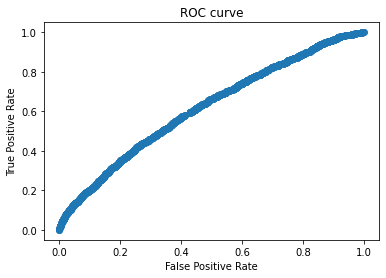

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

In [ ]:
# ML Model RFC

pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=100, random_state=42,max_features='auto',  n_jobs=-1)
)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Company Name', 'Sector'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Company Name',
                                          'data_type': dtype('O'),
                                          'mapping': RVT         1
HI          2
UFAB        3
HLF         4
TYHT        5
         ... 
IRR      4761
GMLPP    4762
EIO      4763
SMTS     4764
NaN        -2
Length: 4765, dtype: int64},
                                         {'col': 'Sector',
                                          'data_type': dtype('O'),
                                          'mapp...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=N

In [ ]:
#RFC Model continued: Evaluation metrics
y_pred_rfc = pipeline.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_rfc))
print(f'Accuracy of train set: {pipeline.score(X_train, y_train)}')
print(f'Accuracy of test set: {pipeline.score(X_test, y_test)}')

Accuracy is 0.573782913430574
Accuracy of train set: 0.9884440515281637
Accuracy of test set: 0.573782913430574


In [ ]:
#RFC Model continued: Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'Confusion Matrix of test set: \n {confusion_matrix(y_test, y_pred_rfc)}')
print('\n')
print(f'Classification report of test set: \n {classification_report(y_test, y_pred_rfc)}')

Confusion Matrix of test set: 
 [[1031 1301]
 [ 949 1998]]


Classification report of test set: 
               precision    recall  f1-score   support

           0       0.52      0.44      0.48      2332
           1       0.61      0.68      0.64      2947

    accuracy                           0.57      5279
   macro avg       0.56      0.56      0.56      5279
weighted avg       0.57      0.57      0.57      5279



In [ ]:
# ML Model SVC
#SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    SVC(kernel='rbf', degree=3, gamma='scale', random_state=42 )
)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Company Name', 'Sector'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Company Name',
                                          'data_type': dtype('O'),
                                          'mapping': RVT         1
HI          2
UFAB        3
HLF         4
TYHT        5
         ... 
IRR      4761
GMLPP    4762
EIO      4763
SMTS     4764
NaN        -2
Length: 4765, dtype: int64},
                                         {'col': 'Sector',
                                          'data_type': dtype('O'),
                                          'mapp...
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
     

In [ ]:
#SVC Model continued: Evaluation metrics
y_pred_svc = pipeline.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_svc))
print(f'Accuracy of train set: {pipeline.score(X_train, y_train)}')
print(f'Accuracy of test set: {pipeline.score(X_test, y_test)}')

Accuracy is 0.5588179579465808
Accuracy of train set: 0.5585375094720889
Accuracy of test set: 0.5588179579465808


In [ ]:
#SVC Model continued: Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'Confusion Matrix of test set: \n {confusion_matrix(y_test, y_pred_svc)}')
print('\n')
print(f'Classification report of test set: \n {classification_report(y_test, y_pred_svc)}')

Confusion Matrix of test set: 
 [[   3 2329]
 [   0 2947]]


Classification report of test set: 
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      2332
           1       0.56      1.00      0.72      2947

    accuracy                           0.56      5279
   macro avg       0.78      0.50      0.36      5279
weighted avg       0.75      0.56      0.40      5279



In [ ]:
# ML Model MLP
#def MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='adam', alpha=0.0001, random_state=42, batch_size='auto',learning_rate='constant', early_stopping=True)
)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Company Name', 'Sector'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Company Name',
                                          'data_type': dtype('O'),
                                          'mapping': RVT         1
HI          2
UFAB        3
HLF         4
TYHT        5
         ... 
IRR      4761
GMLPP    4762
EIO      4763
SMTS     4764
NaN        -2
Length: 4765, dtype: int64},
                                         {'col': 'Sector',
                                          'data_type': dtype('O'),
                                          'mapp...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=True, epsilon=1e-08,
                               hidden_layer_sizes=100, l

In [ ]:
#MLP Model continued: Evaluation metrics
y_pred_mlp = pipeline.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_mlp))
print(f'Accuracy of train set: {pipeline.score(X_train, y_train)}')
print(f'Accuracy of test set: {pipeline.score(X_test, y_test)}')

Accuracy is 0.5870430005682894
Accuracy of train set: 0.5835438241980299
Accuracy of test set: 0.5870430005682894


In [ ]:
#MLP Model continued: Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'Confusion Matrix of test set: \n {confusion_matrix(y_test, y_pred_mlp)}')
print('\n')
print(f'Classification report of test set: \n {classification_report(y_test, y_pred_mlp)}')

Confusion Matrix of test set: 
 [[ 542 1790]
 [ 390 2557]]


Classification report of test set: 
               precision    recall  f1-score   support

           0       0.58      0.23      0.33      2332
           1       0.59      0.87      0.70      2947

    accuracy                           0.59      5279
   macro avg       0.58      0.55      0.52      5279
weighted avg       0.59      0.59      0.54      5279



#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [ ]:
! pip install category_encoders==2.*

     |████████████████████████████████| 81kB 4.3MB/s 


In [ ]:
# split df2018 dataset into training data and testing data. 
from sklearn.model_selection import train_test_split
train_data_2018, test_data_2018 = train_test_split(data2018, train_size = 0.75 , test_size = 0.25,
                               random_state = 42)
train_data_2018.shape, test_data_2018.shape

((3145, 21), (1049, 21))

# Use the derived combined dataset and Column 'Class' as target. As explained above the 'Class =0' implies that price of the stock will decrease and similarly the 'Class =1' implies stock will increase the following year.

In [ ]:
target = ''

Data Visualization set

The results above display that we have 1 class column (1 int) and category column (sector represented as 1 object) and the rest all are numerical columns.

** Data Exploration for 2014 dataset


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



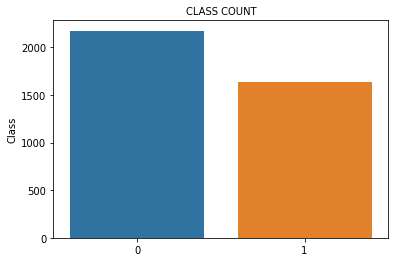

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



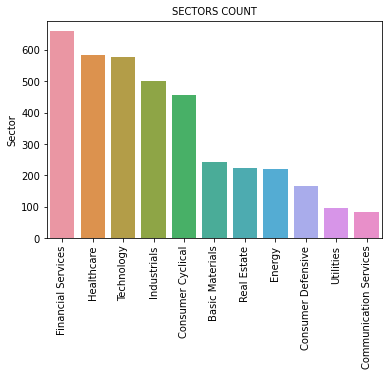

In [ ]:
# Plot class distribution
data_2014_class = data_2014['Class'].value_counts()
sns.barplot(np.arange(len(data_2014_class)), data_2014_class)
plt.title('CLASS COUNT', fontsize=10)
plt.show()

# Plot sector distribution
data_2014_sector = data_2014['Sector'].value_counts()
sns.barplot(np.arange(len(data_2014_sector)), data_2014_sector)
plt.xticks(np.arange(len(data_2014_sector)), data_2014_sector.index.values.tolist(), rotation=90)
plt.title('SECTORS COUNT', fontsize=10)
plt.show()

**RESULTS**

Through the above plot we can infer the following:

The first plot displays 2014 year dataset in terms of class are not balanced. There are 2174 stocks that belong to class 0, which is considered not buy-worthy. The other 1634 stocks during the same year are tagged with class 1, implying buy-worthy stocks. We can use this important observation when we lan splitting data between training and testing data.
The second plot displays the data categorized in terms of 11 sectors, it is observed that 5 of these, individually account for 500+ stocks , where as the remaining 6 sectors have less than 300 stocks. this observation while we use the data against the machine learning algos since sue to less data it might lead to overfitting.

**DATASET EVALUATION**

In [ ]:
# Validating the 2015 PRICE VAR [%], which lists the percent price variation of each stock during the year 2015, and hence extracting from the dataframe
df_price = df.loc[:, ['Sector', '2015 PRICE VAR [%]']]

# Get list of sectors
sector_list = df_['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list:
    
    temp = df_[df_['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2015 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()